In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import HTML
import numpy as np
import random
import os

from cell_class import Cells
from class_population import Population
from land_dataset_fitness import CellDiff_Dataset_Landscape
from morphogen_regimes import *
from landscape_visuals import *
from helper_func import plot_cell_concentration, get_cell_data, delete_all_images, create_directory_if_not_exists
from landscape_segmentation import Somitogenesis_Landscape  #########
from class_module import Node, UnstableNode, Center, NegCenter

seed= 18
save_dir = f'saved_files_{seed}/'

np.random.seed(seed)
from decimal import Decimal, getcontext, ROUND_HALF_UP
getcontext().prec = 6
getcontext().rounding = ROUND_HALF_UP

In [2]:
# Cell Initialization
from cell_class import Cells


t0 = 0.
tf = 80.
tc = 60.
div = 40 #40 cells
repl = 20 #20 replicates
#Total num cell = 40*20 = 800
nt = int(tf*3)
noise_init = 0.5
init_cond=(-8, 0)
W_H_d = 0.5
W_H_dp = 1.5

cell = Cells(t0 = t0, tf = tf, tc = tc , div = div,repl = repl, nt = nt, init_cond = init_cond, W_H_d = 0.5, W_H_dp = 1.5)
cell.create_Start_Times()
cell.init_position(noise=noise_init)

In [3]:
time_pars = (t0, tf, nt)
morphogen_times = (tc,)

par_limits = {
    'x': (-8.,8.),
    'y': (-5., 5.),
    'a': (0.3,3.),
    's': (0.3, 2)
}

par_choice_values = {
    'tau': (5.,),
    'tilt_lmt': (-0.41, -0.01),
}

landscape_pars = {
    'A0': 0.00005,
    'init_cond': (0., 0.),
    'regime': mr_sigmoid,
    'n_regimes': 2,
    'morphogen_times': morphogen_times,
    'used_fp_types': (Node,),
    'immutable_pars_list': [],
    'tilt': -0.35,
    'tilt_par': (0.5)
}

prob_pars = {
    'prob_tilt': 0.10,
    'prob_add': 0.15,
    'prob_drop': 0.15,
    'prob_shuffle': 0.
    # the rest is mutation of parameters
}

fitness_pars = {
    'ncells': 50,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells
    'noise': 0.3,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
    'tilt': (-0.001, -0.4)
}

-0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 

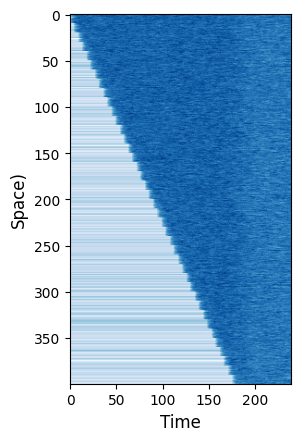

In [4]:
#  Starting with 2 random nodes, then any modules can be added or deleted
start_module_list = [Node.generate(par_limits, par_choice_values, n_regimes=2) for i in range(3)]

# Population size should be even, adjust N to your computing capacity
N = 16
P = Population(cell = cell,N = N, problem_type = Somitogenesis_Landscape, landscape_pars = landscape_pars, prob_pars = prob_pars, fitness_pars = fitness_pars, par_limits = par_limits, par_choice_values = par_choice_values, start_module_list = start_module_list)

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space)', fontsize=12)
plt.show()

In [5]:
print(P.landscape_list[0])

Landscape with modules:
Node at (-0.20973, 4.16623), a = [0.6042  2.59824], s = [0.86507 0.50602], tau = 5.0,
Node at (-6.16803, 0.87469), a = [1.26598 0.96797], s = [1.97246 1.45531], tau = 5.0,
Node at (4.70316, -3.57326), a = [2.0861  1.35632], s = [1.43591 1.76673], tau = 5.0


Directory 'images/18/' created.
Directory 'images/18/evo/' created.
Directory 'images/18/Gif/' created.
Directory 'images/18/Cells/' created.
Timecode: 20240814-141446
Generation: 0
Best fitness: -0.0
Done


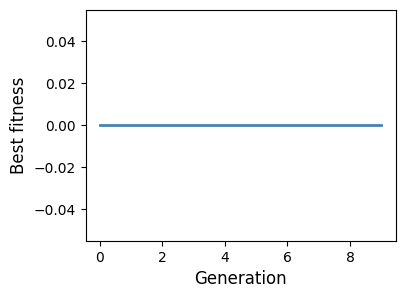

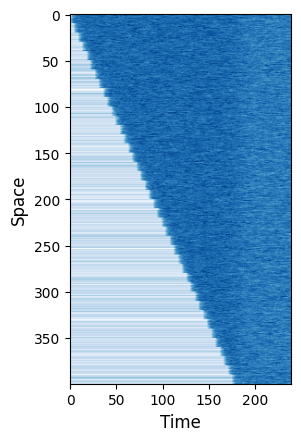

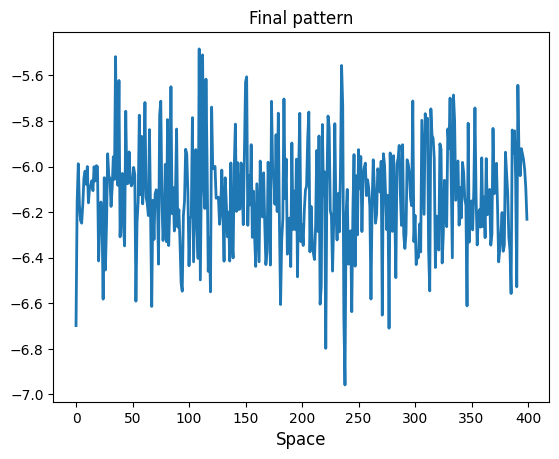

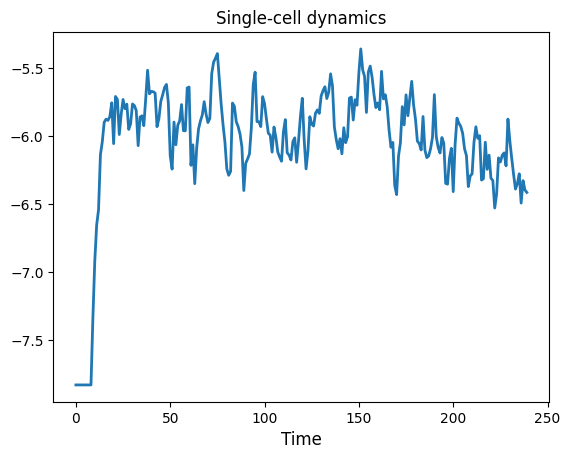

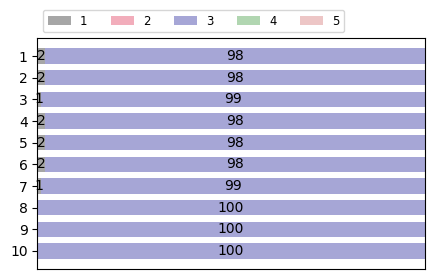

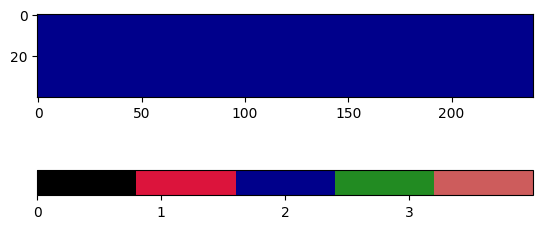

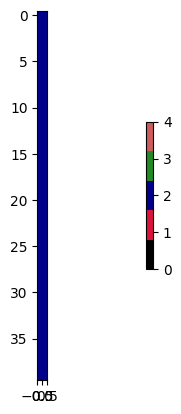

Landscape with modules:
Node at (-6.4204, 4.16623), a = [0.6042  2.59824], s = [0.86507 0.50602], tau = 5.0,
Node at (-6.16803, 0.87469), a = [1.26598 0.96797], s = [1.97246 1.45531], tau = 5.0,
Node at (4.70316, -3.57326), a = [2.0861  1.35632], s = [1.43591 1.76673], tau = 5.0,
Node at (-2.69986, 4.70754), a = [2.79069 1.28458], s = [1.11328 1.60957], tau = 5.0


In [6]:
create_directory_if_not_exists(f"images/{seed}/")
create_directory_if_not_exists(f'images/{seed}/evo/')
create_directory_if_not_exists(f'images/{seed}/Gif/')
create_directory_if_not_exists(f'images/{seed}/Cells/')

fitness_traj = P.evolve_parallel(200, fitness_pars, save_dir, save_each=5, output_dir = f'images/{seed}/evo/')
print('Done')

output_dir = f"images/{seed}/"

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
# plt.ylim((-2,0))
output_path = os.path.join(output_dir, f"Generation_BF.png")
plt.savefig(output_path)
plt.show()

plt.imshow(P.landscape_list[0].result, cmap='Blues')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Space', fontsize=12)
output_path = os.path.join(output_dir, f"Time_Space.png")
plt.savefig(output_path)
plt.show()

plt.plot(P.landscape_list[0].result[:, -1], lw=2)
plt.title('Final pattern', fontsize=12)
plt.xlabel('Space', fontsize=12)
output_path = os.path.join(output_dir, f"FinalPattern.png")
plt.savefig(output_path)
plt.show()

plt.plot(P.landscape_list[0].result[20, :], lw=2)
plt.title('Single-cell dynamics', fontsize=12)
plt.xlabel('Time', fontsize=12)
output_path = os.path.join(output_dir, f"SCdynamics.png")
plt.savefig(output_path)
plt.show()

P.landscape_list[0].cell.get_data_concentration()
cell_data = P.landscape_list[0].cell.data_States
plot_cell_concentration(cell_data, output_dir= output_dir)

visualize_div_time(P.landscape_list[0], output_dir= output_dir, show = True)

visualize_last_div_time(P.landscape_list[0], output_dir= output_dir, show = True)

print(P.landscape_list[0])

In [7]:
create_gif_from_images(f'images/{seed}/evo/', f'images/{seed}/Land_evo.gif', duration=700)
delete_all_images(f'images/{seed}/evo/', '*.png')

GIF saved to images/18/Land_evo.gif


In [8]:
print(np.std(P.landscape_list[0].cell.prob_attrac))

160.0


In [9]:
L = 11.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
output_gif = f'images/{seed}/Gif/'
for istep in range(0, int(P.landscape_list[0].cell.nt) + 1, 2):
    fig = visualize_potential(P.landscape_list[0], xx, yy, regime= istep, color_scheme='order', scatter=True,
                               elev=20, azim=-90, output_gif = output_gif, igen =150, fit = P.landscape_list[0].fitness)

create_gif_from_images(output_gif, f'images/{seed}/potential_time.gif', duration=1000)

GIF saved to images/18/potential_time.gif


In [10]:
video_landscape(P.landscape_list[0], xx, yy, traj_times=None, plot_start=0, size_x=4, size_y=4, ndt= nt, noise_init=2., 
                noise_run=0.2, tstep = 0 ,color_scheme='fp_types', colors=None, video_name = 'Land_cells_n',
                  same_time=False, dwl= False, output_dir =f'images/{seed}/')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved successfully as images/17/Land_cells_n.mp4


In [11]:
print(P.landscape_list[0].cell.penal)
print(P.landscape_list[0].cell.h_diversity)

0
1.5552107938912747


In [12]:
new_prob_attrac = P.landscape_list[0].cell.prob_attrac[1:] 
ideal_num_cell = P.landscape_list[0].cell.num_cells / P.landscape_list[0].cell.n_attrac
print(np.sqrt(np.mean((new_prob_attrac - ideal_num_cell)**2)))

53.75458636763523
